In [46]:
import numpy as np
from nnl import bundle as nn
import keras.datasets.mnist
import matplotlib.pyplot as plt

print('imported modules successfully 🎉')

imported modules successfully 🎉


## Loading dataset:

In [47]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

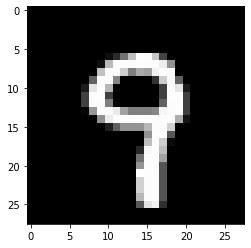

In [48]:
plt.imshow(X_train[1112],cmap='gray')
plt.show()

## Preprocessing Data

In [49]:
X_test1 = []
X_train1 = []

for i in range(0,len(X_train)):
    X_train1.append(np.reshape(X_train[i],(784)))

for i in range(0,len(X_test)):
    X_test1.append(np.reshape(X_test[i],(784)))

X_train1 = np.array(X_train1)
X_test1 = np.array(X_test1)

## Initializing Model

In [50]:
model = nn.Model()

### Adding layers to the model

In [51]:
model.add(nn.layer_dense(784, 128))
model.add(nn.relu())
model.add(nn.layer_dense(128, 128))
model.add(nn.relu())
model.add(nn.layer_dense(128, 10))
model.add(nn.softmax())

In [52]:
model.set(
    loss=nn.loss_categoricalCrossentropy(),
    optimizer=nn.optimizer_adam(decay=1e-3),
    accuracy=nn.accuracy_categorical()
)

model.finalize()

### Training the model:

In [53]:
model.train(X_train1, y_train, validation_data=(X_test1, y_test),
            epochs=10, batch_size=128, print_every=1)

epoch: 0
training, acc: 0.926, loss: 0.245 (data_loss: 0.245, reg_loss: 0.000), lr: 0.000681198910081744

epoch: 1
training, acc: 0.971, loss: 0.095 (data_loss: 0.095, reg_loss: 0.000), lr: 0.0005162622612287042

epoch: 2
training, acc: 0.982, loss: 0.059 (data_loss: 0.059, reg_loss: 0.000), lr: 0.0004156275976724854

epoch: 3
training, acc: 0.988, loss: 0.039 (data_loss: 0.039, reg_loss: 0.000), lr: 0.00034782608695652176

epoch: 4
training, acc: 0.993, loss: 0.025 (data_loss: 0.025, reg_loss: 0.000), lr: 0.0002990430622009569

epoch: 5
training, acc: 0.994, loss: 0.018 (data_loss: 0.018, reg_loss: 0.000), lr: 0.00026226068712300026

epoch: 6
training, acc: 0.996, loss: 0.013 (data_loss: 0.013, reg_loss: 0.000), lr: 0.00023353573096683791

epoch: 7
training, acc: 0.997, loss: 0.010 (data_loss: 0.010, reg_loss: 0.000), lr: 0.00021048200378867611

epoch: 8
training, acc: 0.998, loss: 0.007 (data_loss: 0.007, reg_loss: 0.000), lr: 0.00019157088122605365

epoch: 9
training, acc: 0.999, lo

## Getting output (**model prediction**)

In [54]:
test_answer = y_test[4545]
test_input = X_test1[4545]

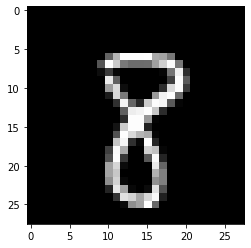

In [55]:
plt.imshow(X_test[4545],cmap='gray')
plt.show()

In [58]:
np.argmax(model.predict(test_input)) == test_answer

True